# Train diabetes classification model

This notebook reads a CSV file and trains a model to predict diabetes in patients. The data is already preprocessed and requires no feature engineering.

The evaluation methods were used during experimentation to decide whether the model was accurate enough. Moving forward, there's a preference to use the autolog feature of MLflow to more easily deploy the model later on.

## Read data from local file



In [101]:
import pandas as pd
import numpy as np
import mlflow
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from mlflow.models import infer_signature
from mlflow.utils.environment import _mlflow_conda_env

In [129]:
df = pd.read_csv('data/diabetes-dev.csv')
df.iloc[:3500,0:9]

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age
0,1142956,1,78,41,33,311,50.796392,0.420804,24
1,1823377,0,116,92,16,184,18.603630,0.131156,22
2,1916381,8,171,42,29,160,35.482247,0.082671,22
3,1247480,3,108,63,45,297,49.375169,0.100979,46
4,1516947,8,153,99,15,41,35.062139,0.116191,22
...,...,...,...,...,...,...,...,...,...
3495,1761762,0,173,86,22,155,20.582001,0.142724,25
3496,1739023,1,85,41,11,61,19.581473,0.232070,21
3497,1282760,0,59,94,42,452,18.502925,0.139443,25
3498,1560780,0,92,50,45,39,31.854076,0.588531,23


## Split data

In [130]:
(df.iloc[3500:,:9])

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age
3500,1375443,1,49,58,9,344,36.729640,0.078674,23
3501,1516355,5,98,73,45,262,37.407805,1.192934,29
3502,1711975,5,70,90,28,140,45.687114,0.159082,34
3503,1595934,3,106,83,12,251,26.934988,0.910005,46
3504,1950475,1,74,81,24,82,21.850101,0.156772,23
...,...,...,...,...,...,...,...,...,...
4995,1490300,10,65,60,46,177,33.512468,0.148327,41
4996,1744410,2,73,66,27,168,30.132636,0.862252,38
4997,1742742,0,93,89,43,57,18.690683,0.427049,24
4998,1099353,0,132,98,18,161,19.791645,0.302257,23


In [131]:
len(df.columns)

10

In [132]:
print(np.unique(y, return_counts=True))

(array([0, 1]), array([3344, 1656]))


In [133]:
def split_data(df):
    X, y = df[['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']].values, df['Diabetic'].values
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=0)
    return X_train,X_test,y_train,y_test

In [134]:
X_train, X_test, y_train, y_test = split_data(df)

In [135]:
(X_train)

array([[0.00000000e+00, 1.49000000e+02, 5.40000000e+01, ...,
        1.97679178e+01, 1.22862008e-01, 2.40000000e+01],
       [1.00000000e+00, 1.16000000e+02, 5.60000000e+01, ...,
        2.66468729e+01, 2.39664211e-01, 2.10000000e+01],
       [0.00000000e+00, 7.60000000e+01, 5.10000000e+01, ...,
        4.81768081e+01, 1.28521750e-01, 2.20000000e+01],
       ...,
       [1.00000000e+00, 8.60000000e+01, 6.20000000e+01, ...,
        1.92161278e+01, 1.79411366e-01, 2.50000000e+01],
       [6.00000000e+00, 9.60000000e+01, 5.80000000e+01, ...,
        3.80706238e+01, 8.55094664e-01, 3.10000000e+01],
       [1.00000000e+00, 8.60000000e+01, 5.70000000e+01, ...,
        2.18871770e+01, 2.18392991e-01, 2.30000000e+01]])

## Train model

In [108]:
mlflow.autolog(log_models=False)
model = LogisticRegression(C=1/0.1, solver="liblinear").fit(X_train, y_train)

2022/11/11 17:20:34 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of sklearn. If you encounter errors during autologging, try upgrading / downgrading sklearn to a supported version, or try upgrading MLflow.
2022/11/11 17:20:35 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2022/11/11 17:20:35 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'd52ac3f481494b64ad17cb5d844fa5d0', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Evaluate model

In [127]:
y_hat = model.predict(X_test)
y_test.res
acc = np.average(y_hat == y_test)
acc
mlflow.log_metric("accuracy", acc)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


ValueError: X has 8 features, but LogisticRegression is expecting 9 features as input.

In [114]:
(y_hat)

array([0, 0, 0, ..., 0, 0, 1])

In [25]:
y_scores = model.predict_proba(X_test)
auc = roc_auc_score(y_test,y_scores[:,1])
auc

Text(0.5, 1.0, 'ROC Curve')

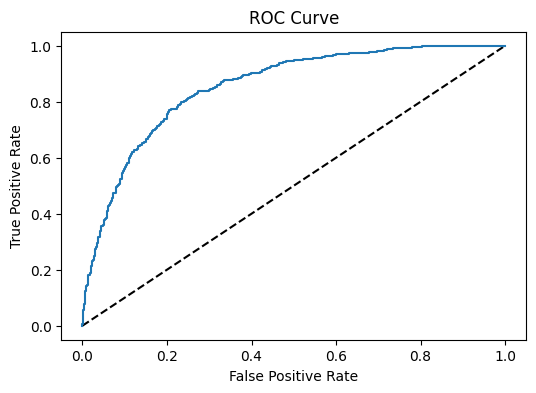

In [30]:
# plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])
fig = plt.figure(figsize=(6, 4))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')